<img src="https://images.pexels.com/photos/248152/pexels-photo-248152.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style='width:300px'>

## Classification Case Study

The researchers at SABIC Innovative Plastics US are working on refining the manufacturing process for new polymers. Creating this polymer involves combining 12 materials and 45 mechanical processes (order of processes is unimportant). The prices of ingredients vary as do the amount of time needed for each process done by individual machines that would otherwise be used to make other products. The CSuite requires a pared down list of materials and processes before polymers can go to market. 

A polymer yield greater than or equal to 41 grams is considered "high".

You will use logistic regression to create a classification model find the material and process combination that produces high yield.

### Business Problem

#### End Users:

- Scientists, budgeting department, CSuite

#### True business problem:

- Create a model that can, if given data from from repeated chemical manufacturing trials, predict if the polymer yield will be high (worth the money). 

#### Context:

- **False negative** in this context: Predicts that an actually high-yield combination will be low yield.
    - **Outcome**: Missed polymer opportunity
    
- **False positive** in this context: Predicts that an actually low-yield combination will be high yield.

    - **Outcome**: Unreliable formula. Takes longer to go to market. Potential company waste.

#### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- Precision
- Recall
- F1-Score

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.display import display, HTML

## Read in data & take a look

In [2]:
df = pd.read_csv('ChemicalManufacturingProcess.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 58 columns):
Yield                     176 non-null float64
BiologicalMaterial01      176 non-null float64
BiologicalMaterial02      176 non-null float64
BiologicalMaterial03      176 non-null float64
BiologicalMaterial04      176 non-null float64
BiologicalMaterial05      176 non-null float64
BiologicalMaterial06      176 non-null float64
BiologicalMaterial07      176 non-null float64
BiologicalMaterial08      176 non-null float64
BiologicalMaterial09      176 non-null float64
BiologicalMaterial10      176 non-null float64
BiologicalMaterial11      176 non-null float64
BiologicalMaterial12      176 non-null float64
ManufacturingProcess01    175 non-null float64
ManufacturingProcess02    173 non-null float64
ManufacturingProcess03    161 non-null float64
ManufacturingProcess04    175 non-null float64
ManufacturingProcess05    175 non-null float64
ManufacturingProcess06    174 non-null float64
Ma

In [4]:
df.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1


## Train test split

Encode `Yield` into `1/0` depending on if it's equal or greater than 41.

In [5]:
# train test split

X = df.drop(columns = ['Yield'])
y = (df['Yield'] >= 41).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Preprocessing pipeling
- impute missing values in columns
- scale using max absolute value (this was chosen after trial and error with other scalers)

In [6]:
# Pipeline preprocessing
imp = SimpleImputer(missing_values=np.nan, strategy='median')
mscale = MaxAbsScaler()

prep = [('imputer', imp), ('scaler', mscale)]

pipe = Pipeline(prep)

In [7]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler', MaxAbsScaler(copy=True))],
         verbose=False)

In [8]:
X_train_prepped = pipe.transform(X_train)

## Create logistic regression model
Using *all* variables. 

In [9]:
lgrg1 = LogisticRegression(random_state = 100)

In [10]:
lgrg1.fit(X_train_prepped, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_train_pred = lgrg1.predict(X_train_prepped)

## Evaluate
Check the accuracy of the model. <br>
Remember, `sklearn` uses a threshold cutoff of `0.5`

In [12]:
accuracy_score(y_train, y_train_pred)

0.8106060606060606

## But is that the **BEST** cutoff?

- get predicted probabilities using `X_train_prepped`
- use `pipe` to transform `X_test`
- predict `y_test_pred_probs` using `lgrg1`

In [13]:
# get predicted probabilities (log odds) from model for train set
y_train_pred_probs = lgrg1.predict_proba(X_train_prepped)[:, 1]

In [14]:
y_train_pred_probs

array([0.19726489, 0.75638289, 0.09860723, 0.24018477, 0.06869545,
       0.27351465, 0.1938406 , 0.13626354, 0.3023367 , 0.13153604,
       0.36435281, 0.24662573, 0.22719224, 0.68290227, 0.25802145,
       0.17946635, 0.18031436, 0.12954954, 0.08020303, 0.08768772,
       0.58229959, 0.70126416, 0.30881055, 0.32218491, 0.54954235,
       0.44413086, 0.14246525, 0.24291833, 0.27815621, 0.54856931,
       0.24024235, 0.44071982, 0.19392834, 0.23314209, 0.29375629,
       0.44360171, 0.59238883, 0.13391986, 0.20121733, 0.68960317,
       0.22991579, 0.31486055, 0.56095295, 0.24866276, 0.23240914,
       0.22887591, 0.17677034, 0.68258978, 0.07845342, 0.07236667,
       0.0864656 , 0.14512847, 0.07664751, 0.45847102, 0.10239353,
       0.23145235, 0.10246183, 0.35765968, 0.18696103, 0.26798821,
       0.28257671, 0.31044959, 0.29066247, 0.32829838, 0.28130621,
       0.09678892, 0.19993376, 0.27024134, 0.45716383, 0.80679521,
       0.26259961, 0.69826273, 0.0867844 , 0.49353297, 0.63359

In [15]:
y_train_compare = pd.DataFrame([y_train.reset_index()['Yield'], y_train_pred]).T.set_index(y_train.index).rename(columns={"Yield":"Actual", "Unnamed 0":"Predicted"})

In [16]:
y_train_compare.head()

,Actual,Predicted
142,0,0
2,1,1
100,0,0
122,1,0
153,0,0


In [17]:
len(y_train_pred_probs)

132

In [18]:
y_train_pred_probs_df = pd.DataFrame(y_train_pred_probs, columns=['Predicted Probability'], index=y_train.index)

In [19]:
y_train_outcomes = pd.concat([y_train_compare, y_train_pred_probs_df], axis=1)

In [20]:
y_train_outcomes.head()

,Actual,Predicted,Predicted Probability
142,0,0,0.197265
2,1,1,0.756383
100,0,0,0.098607
122,1,0,0.240185
153,0,0,0.068695


In [21]:
# Transform X_test
X_test_transformed = pipe.transform(X_test)

# Get probabilites
y_test_pred_probs = lgrg1.predict_proba(X_test_transformed)[:, 1]

In [22]:
# now you, hypothetical reader, should try to do the same as above but for the test set!

Use `for` loop to iterate over various thresholds and calculate the accuracy for both train and test.

In [23]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_acc', 'test_acc', 'train_prec', 'test_prec',
                                   'train_rec', 'test_rec', 'train_f1', 'test_f1'])

for x in np.arange(y_train_pred_probs.min(), y_train_pred_probs.max(), 0.01):
    placeholder = []
    threshold = x
    
    y_pred_train = np.where(y_train_pred_probs > x, 1, 0)
    y_pred_test = np.where(y_test_pred_probs > x, 1, 0)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    placeholder = [threshold, train_acc, test_acc, train_prec, test_prec,
                  train_rec, test_rec, train_f1, test_f1]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_acc', 'test_acc', 'train_prec', 'test_prec',
                         'train_rec', 'test_rec', 'train_f1', 'test_f1'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
metrics_df.head()

,threshold,train_acc,test_acc,train_prec,test_prec,train_rec,test_rec,train_f1,test_f1
0,0.049627,0.310606,0.386364,0.305344,0.357143,1.0,1.0,0.467836,0.526316
1,0.059627,0.310606,0.409091,0.305344,0.365854,1.0,1.0,0.467836,0.535714
2,0.069627,0.325758,0.409091,0.310078,0.365854,1.0,1.0,0.473373,0.535714
3,0.079627,0.348485,0.409091,0.317460,0.365854,1.0,1.0,0.481928,0.535714
4,0.089627,0.378788,0.431818,0.327869,0.375000,1.0,1.0,0.493827,0.545455


## **Plot** the results

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()


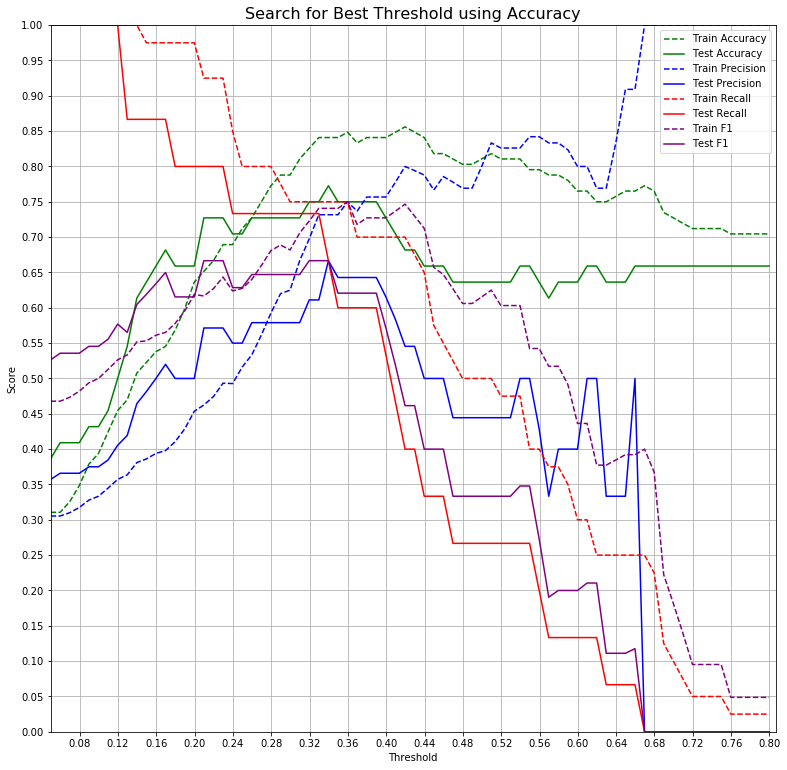

In [25]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold using Accuracy",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs.min(), y_train_pred_probs.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].data, dtype=float)

ax.plot(X_axis, metrics_df['train_acc'], ls='--',
        color='g', label='Train Accuracy')
ax.plot(X_axis, metrics_df['test_acc'], ls='-',
        color='g', label='Test Accuracy')

ax.plot(X_axis, metrics_df['train_prec'], ls='--',
        color='b', label='Train Precision')
ax.plot(X_axis, metrics_df['test_prec'], ls='-',
        color='b', label='Test Precision')

ax.plot(X_axis, metrics_df['train_rec'], ls='--',
        color='r', label='Train Recall')
ax.plot(X_axis, metrics_df['test_rec'], ls='-',
        color='r', label='Test Recall')

ax.plot(X_axis, metrics_df['train_f1'], ls='--',
        color='purple', label='Train F1')
ax.plot(X_axis, metrics_df['test_f1'], ls='-',
        color='purple', label='Test F1')

plt.legend()

## Question:

- Is `.5` the best cutoff?
- What is the best choice?
- Why?

-----

## **Advanced** Questions (Optional):

- While you're able to predict high yield, are you able to produce a reduced process/materials list?
- How would you adjust the `LogisticRegression` arguments to produce a reduced list?
- Is the model "done"? How would you check to see if multi-collinearity is an issue?

In [26]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(lgrg1.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns =['Coef'], orient='index')
coef_df.sort_values(by=['Coef'], ascending = False)

,Coef
ManufacturingProcess12,1.207533
BiologicalMaterial06,0.582023
ManufacturingProcess32,0.556214
ManufacturingProcess11,0.540858
ManufacturingProcess30,0.515094
BiologicalMaterial02,0.505567
BiologicalMaterial04,0.452495
ManufacturingProcess43,0.433887
BiologicalMaterial05,0.426035
ManufacturingProcess39,0.403617


#### Set `C` to 0.02 to increase the penalty and perhaps decrease the variable set

In [27]:
lgrg2 = LogisticRegression(C=.02, random_state = 100)
lgrg2.fit(X_train_prepped, y_train)
y_train_pred_probs = lgrg2.predict_proba(X_train_prepped)[:, 1]
y_test_pred_probs = lgrg2.predict_proba(X_test_transformed)[:, 1]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Check - Did this change the thresholds?

In [28]:
metrics_df = pd.DataFrame(columns = ['threshold','train_acc', 'test_acc'])

for x in np.arange(y_train_pred_probs.min(),y_train_pred_probs.max(), 0.01):
    placeholder =[]
    threshold = x
    y_pred_train = np.where(y_train_pred_probs>x,1,0)
    r_pred_test = np.where(y_test_pred_probs>x, 1, 0)
    train_acc = accuracy_score(y_train,y_pred_train)
    test_acc = accuracy_score(y_test,r_pred_test)
    placeholder = [threshold,train_acc, test_acc]
    sample_S = pd.Series(placeholder,index = ['threshold','train_acc', 'test_acc'] )
    metrics_df = metrics_df.append(sample_S, ignore_index = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()


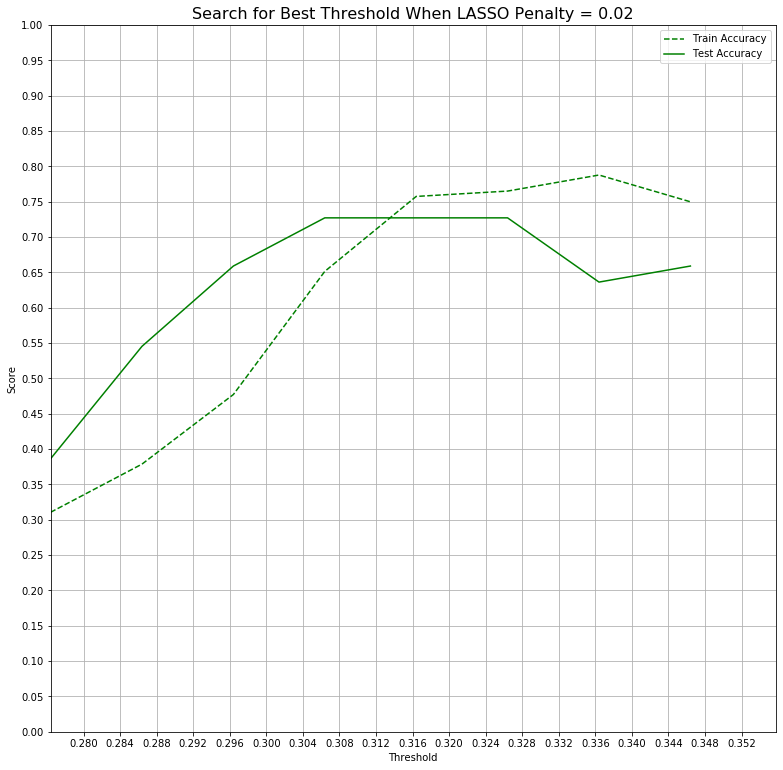

In [29]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold When LASSO Penalty = 0.02",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs.min(), y_train_pred_probs.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].data, dtype=float)

ax.plot(X_axis, metrics_df['train_acc'], ls='--', color='g', label='Train Accuracy')
ax.plot(X_axis, metrics_df['test_acc'], ls='-', color='g', label='Test Accuracy')

plt.legend()

### How did it change the coefficients?

Did any of them move closer to zero so you can give a reduced list of variables to managment?

In [30]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(lgrg2.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df2 = pd.DataFrame.from_dict(coef_dict, columns =['Coef2'], orient='index')
coef_df2.sort_values(by=['Coef2'], ascending = False)

coef_df.merge(coef_df2,left_index=True, right_index = True)

,Coef,Coef2
BiologicalMaterial01,0.334819,0.007431
BiologicalMaterial02,0.505567,0.009203
BiologicalMaterial03,0.338994,-0.002373
BiologicalMaterial04,0.452495,0.012510
BiologicalMaterial05,0.426035,0.002281
BiologicalMaterial06,0.582023,0.010892
BiologicalMaterial07,-0.109471,-0.022988
BiologicalMaterial08,0.061809,-0.009889
BiologicalMaterial09,-0.241850,-0.023940
BiologicalMaterial10,0.043281,0.003433


In [31]:
coef_df.merge(coef_df2,left_index=True, right_index = True)

,Coef,Coef2
BiologicalMaterial01,0.334819,0.007431
BiologicalMaterial02,0.505567,0.009203
BiologicalMaterial03,0.338994,-0.002373
BiologicalMaterial04,0.452495,0.012510
BiologicalMaterial05,0.426035,0.002281
BiologicalMaterial06,0.582023,0.010892
BiologicalMaterial07,-0.109471,-0.022988
BiologicalMaterial08,0.061809,-0.009889
BiologicalMaterial09,-0.241850,-0.023940
BiologicalMaterial10,0.043281,0.003433


#### Check for multi-collinearity
(do not need to solve it now, only checking)

In [32]:
df_corr = X_train.corr().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']

# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df_corr[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df_corr['FEATURE_1']==df_corr['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df_corr = df_corr[~mask_dups]
df_corr[abs(df_corr['CORRELATION'])>.8]

,FEATURE_1,FEATURE_2,CORRELATION
3,BiologicalMaterial01,BiologicalMaterial04,0.804935
59,BiologicalMaterial02,BiologicalMaterial03,0.847295
62,BiologicalMaterial02,BiologicalMaterial06,0.954811
119,BiologicalMaterial03,BiologicalMaterial06,0.855025
180,BiologicalMaterial04,BiologicalMaterial10,0.921538
296,BiologicalMaterial06,BiologicalMaterial12,0.806741
581,BiologicalMaterial11,BiologicalMaterial12,0.896765
1164,ManufacturingProcess09,ManufacturingProcess13,-0.820640
1222,ManufacturingProcess10,ManufacturingProcess14,-0.830498
1283,ManufacturingProcess11,ManufacturingProcess18,-0.886461
